In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read both CSV files
yield_data = pd.read_csv("crop_yield.csv")
recommend_data = pd.read_csv("Crop_recommendation.csv")

# Convert crop names to lowercase to match properly
yield_data['Crop'] = yield_data['Crop'].str.strip().str.lower()
recommend_data['label'] = recommend_data['label'].str.strip().str.lower()

# Rename 'label' to 'Crop' so we can merge using crop name
recommend_data.rename(columns={'label': 'Crop'}, inplace=True)

#Merge both datasets using 'Crop'
merged = pd.merge(recommend_data, yield_data, on='Crop', how='inner')

#Remove rows with missing data (if any)
merged.dropna(inplace=True)
merged.to_csv("merged_agri_dataset.csv", index=False)
print("Merged dataset saved as 'merged_agri_dataset.csv'")
print("Rows:", merged.shape[0], " Columns:", merged.shape[1])
print("\nColumns in merged dataset:")
print(merged.columns)

data = pd.read_csv("merged_agri_dataset.csv")
print("Data Loaded Successfully!")
print("Rows:", data.shape[0], " Columns:", data.shape[1])

Merged dataset saved as 'merged_agri_dataset.csv'
Rows: 277000  Columns: 17

Columns in merged dataset:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop',
       'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall',
       'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')
Data Loaded Successfully!
Rows: 277000  Columns: 17


In [4]:
print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277000 entries, 0 to 276999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   N                277000 non-null  int64  
 1   P                277000 non-null  int64  
 2   K                277000 non-null  int64  
 3   temperature      277000 non-null  float64
 4   humidity         277000 non-null  float64
 5   ph               277000 non-null  float64
 6   rainfall         277000 non-null  float64
 7   Crop             277000 non-null  object 
 8   Crop_Year        277000 non-null  int64  
 9   Season           277000 non-null  object 
 10  State            277000 non-null  object 
 11  Area             277000 non-null  float64
 12  Production       277000 non-null  int64  
 13  Annual_Rainfall  277000 non-null  float64
 14  Fertilizer       277000 non-null  float64
 15  Pesticide        277000 non-null  float64
 16  Yield            277000

In [5]:
#Check missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
N                  0
P                  0
K                  0
temperature        0
humidity           0
ph                 0
rainfall           0
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [6]:
#Remove duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)


Duplicate Rows: 0


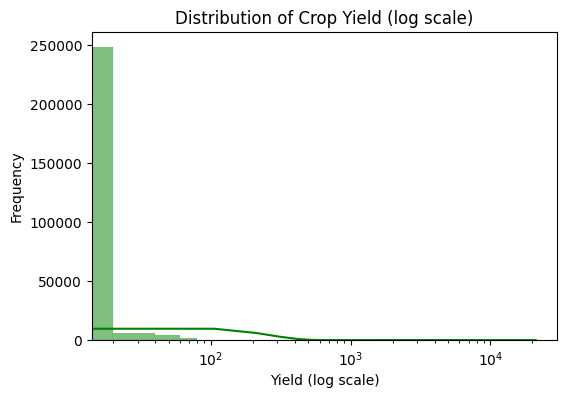

In [7]:
#Visualize distribution of target variable (Yield)
plt.figure(figsize=(6,4))
sns.histplot(data['Yield'], kde=True, color='green')
plt.xscale('log')                   
plt.title("Distribution of Crop Yield (log scale)")
plt.xlabel("Yield (log scale)")
plt.ylabel("Frequency")
plt.show()

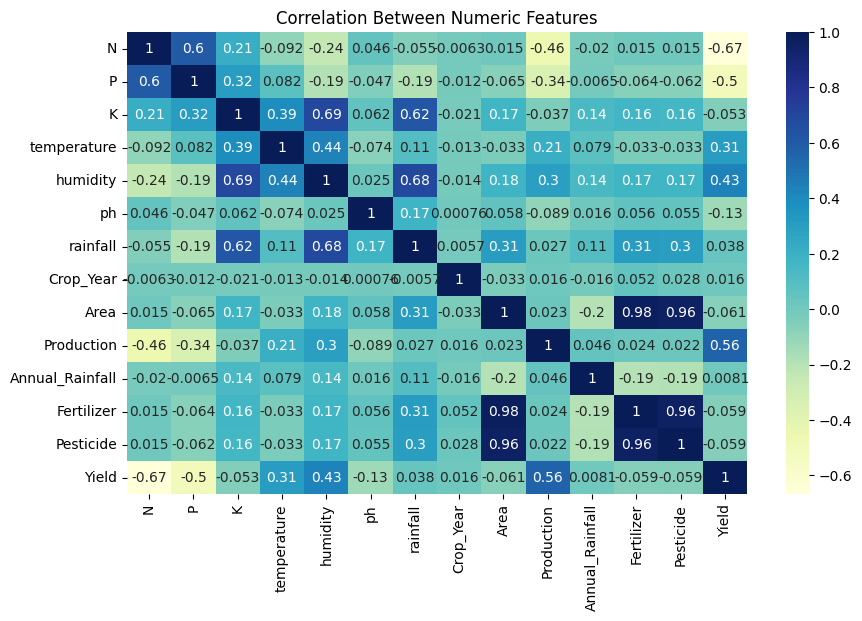

In [8]:
# Correlation heatmap for only numeric features
numeric_data = data.select_dtypes(include=['number'])  # only numbers
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numeric Features")
plt.show()

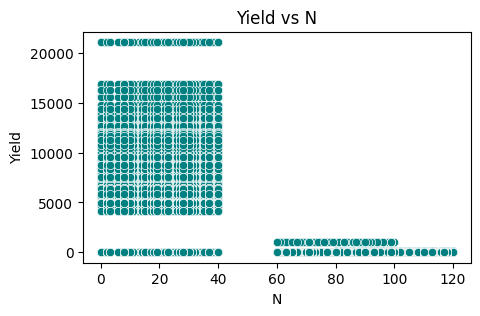

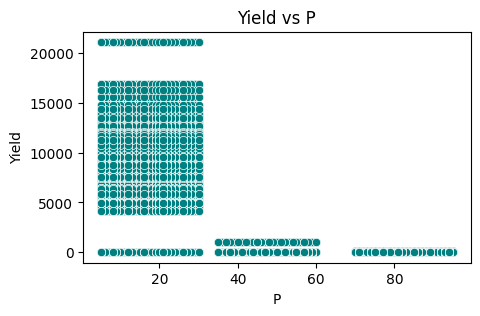

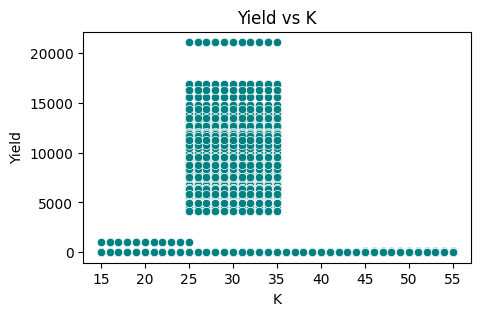

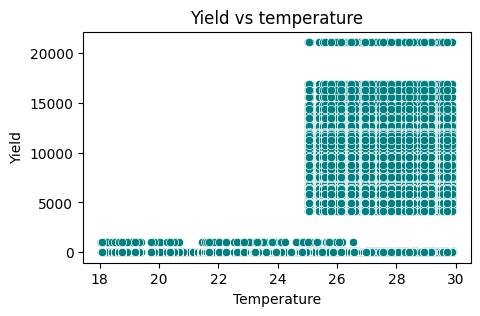

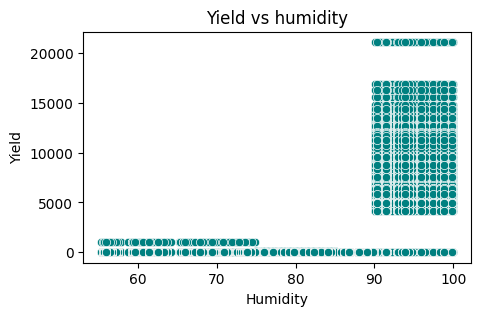

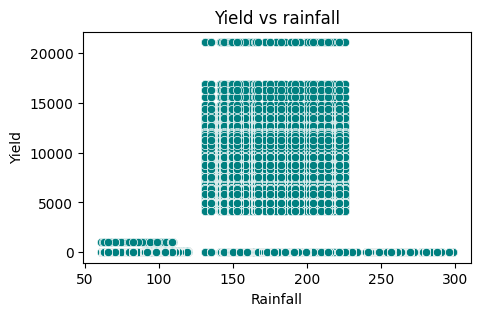

In [9]:
# Relationship between features & Yield
important_features = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']

for col in important_features:
    if col in data.columns:
        plt.figure(figsize=(5,3))
        sns.scatterplot(x=data[col], y=data['Yield'], color='teal')
        plt.title(f"Yield vs {col}")
        plt.xlabel(col.capitalize())
        plt.ylabel("Yield")
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")


In [10]:
# Encode categorical columns (like Crop, Season, or State)
cat_cols = data.select_dtypes(include='object').columns
print("\nCategorical Columns Found:", list(cat_cols))

if len(cat_cols) > 0:
    le = LabelEncoder()
    for col in cat_cols:
        data[col] = le.fit_transform(data[col])
    print("All categorical columns encoded successfully!")
else:
    print("No categorical columns found to encode.")
data.to_csv("processed_agri_dataset.csv", index=False)
print("Processed file saved as: processed_agri_dataset.csv")


Categorical Columns Found: ['Crop', 'Season', 'State']
All categorical columns encoded successfully!
Processed file saved as: processed_agri_dataset.csv
